In [4]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf

In [5]:
# Importar datos de yfinance: me Meta, Netflix y de Tesla
lista = ["META", "NFLX", "TSLA"]
base = yf.download(lista)

# tomar precios de cierre
base = base["Adj Close"]

# borrar datos
datos = base.dropna().pct_change(1).dropna()

[*********************100%***********************]  3 of 3 completed


In [6]:
datos.head()

,META,NFLX,TSLA
Date,,,
2012-05-21,-0.109861,0.025443,0.043904
2012-05-22,-0.089039,-0.056175,0.070559
2012-05-23,0.032258,0.062029,0.007143
2012-05-24,0.032187,-0.022806,-0.023855
2012-05-25,-0.033909,-0.000711,-0.015522


In [7]:
def MV_criterion(weights, data):
    

    # Parametros    Lambda = 3
    W = 1
    Wbar = 1 + 0.25 / 100

    # Retornos del portafolio
    portfolio_return = np.multiply(data, np.transpose(weights))
    portfolio_return = portfolio_return.sum(axis=1)

    # volatilidad del portafolio
    mean = np.mean(portfolio_return, axis=0)
    std = np.std(portfolio_return, axis=0)

    # Criterio
    criterion = Wbar ** (1 - Lambda) / (1 + Lambda) + Wbar ** (-Lambda) \
                * W * mean - Lambda / 2 * Wbar ** (-1 - Lambda) * W ** 2 * std ** 2
    criterion = -criterion
    
    return criterion

In [29]:
# Define train and test sets
split = int(0.7 * len(datos))
train_set = datos.iloc[:split, :]
test_set = datos.iloc[split:, :]

# Find the number of asset
n = datos.shape[1]

# Initialisation weight value
x0 = np.ones(n)

# Optimization constraints problem
cons = ({'type': 'eq', 'fun': lambda x: sum(abs(x)) - 1})

# Set the bounds
Bounds = [(0, 1) for i in range(0, n)]

# Optimization problem solving
res_MV = minimize(MV_criterion, x0, method="SLSQP",
                  args=(train_set), bounds=Bounds,
                  constraints=cons, options={'disp': True})

# Result for computations
X_MV = res_MV.x

Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.25083002120872744
            Iterations: 10
            Function evaluations: 80
            Gradient evaluations: 10


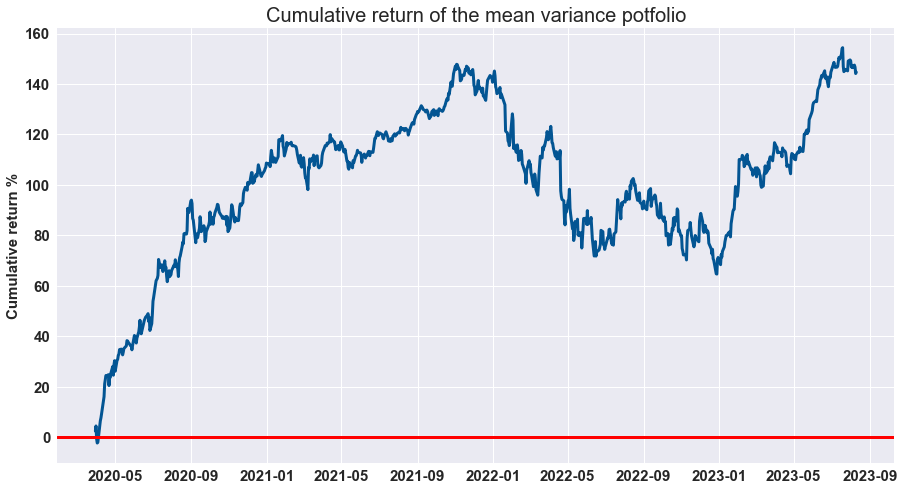

In [12]:
# Compute the cumulative return of the portfolio (CM)
portfolio_return_MV = np.multiply(test_set,np.transpose(X_MV))
portfolio_return_MV = portfolio_return_MV.sum(axis=1)

# Plot the CM
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(portfolio_return_MV)*100, color="#035593", linewidth=3)
plt.ylabel("Cumulative return %", size=15, fontweight="bold")
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.title("Cumulative return of the mean variance potfolio", size=20)
plt.axhline(0, color="r",linewidth=3)
plt.show()

### Medias móviles

In [25]:
datos["SMA15 META"] = datos["NFLX"].rolling(15).mean().shift(1)
datos["SMA15 NFLX"] = datos["NFLX"].rolling(15).mean().shift(1)
datos["SMA15 TSLA"] = datos["TSLA"].rolling(15).mean().shift(1)

# Create a SMA60
datos["SMA60 META"] = datos["META"].rolling(60).mean().shift(1)

# Plot the data
print(datos)

                META      NFLX      TSLA  SMA15 NFLX  SMA15 TSLA  SMA60 META  \
Date                                                                           
2012-05-21 -0.109861  0.025443  0.043904         NaN         NaN         NaN   
2012-05-22 -0.089039 -0.056175  0.070559         NaN         NaN         NaN   
2012-05-23  0.032258  0.062029  0.007143         NaN         NaN         NaN   
2012-05-24  0.032187 -0.022806 -0.023855         NaN         NaN         NaN   
2012-05-25 -0.033909 -0.000711 -0.015522         NaN         NaN         NaN   
...              ...       ...       ...         ...         ...         ...   
2023-08-04 -0.007855  0.001392 -0.021055   -0.002445   -0.004030    0.005085   
2023-08-07  0.018762  0.021223 -0.009493   -0.001099   -0.006268    0.004947   
2023-08-08 -0.012383 -0.005581 -0.006960   -0.000912   -0.009034    0.005281   
2023-08-09 -0.023765 -0.021446 -0.030076   -0.004950   -0.010177    0.004880   
2023-08-10  0.001737  0.002518  0.013006

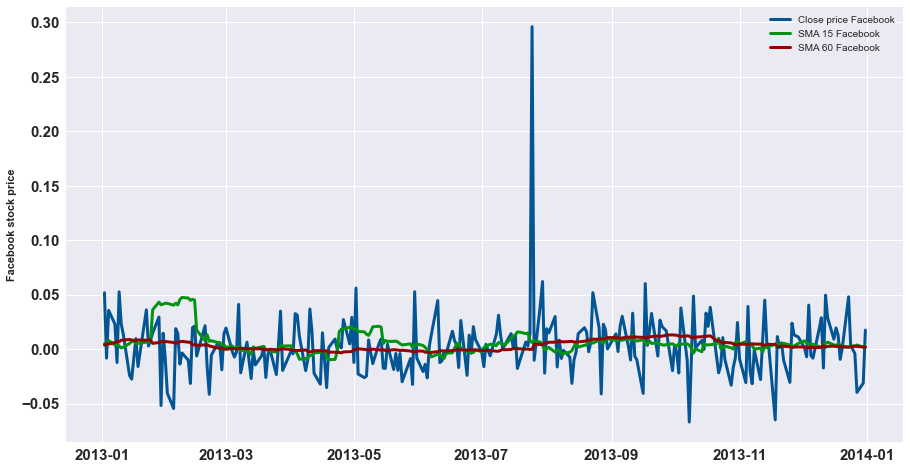

In [28]:
plt.figure(figsize=(15,8))
plt.plot(datos["META"].loc["2013"], color="#035593", linewidth=3)
plt.plot(datos["SMA15 META"].loc["2013"], color="#039313", linewidth=3)
plt.plot(datos["SMA60 META"].loc["2013"], color="#930303", linewidth=3)
plt.ylabel("Facebook stock price",fontweight="bold")
plt.legend(["Close price Facebook", "SMA 15 Facebook", "SMA 60 Facebook"])
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.show()
